In [1]:
#!pip install torch
#!pip install torchvision
#!pip install matplotlib

In [2]:
import os
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt

from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader

# GPU

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [4]:
## PVI - opis problema

## Brain Tumor MRI Dataset
https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset/data

## Opis problema

Tumor mozga predstavlja abnormalne ćelije u mozgu, koji mogu da se razvijaju na nervnom tkivu, krvnim sudovima mozga, moždanim opnama, unutarlobanjskim delovima moždanih živaca... Tumori mozga predstavljaju zasebnu grupu tumora, kako se po svojim osobinama razlikuju u odnosu na tumore drugih organskih sistema. Tumori mogu biti kancerogeni (maligni) ili nekancerogeni (beningni), međutim razlike ova dva oblika kod unutarlobanjskih tumora su manje izražene nego kod tumora drugih sistema. Bilo koja od ove dve vrste, prilikom njihovog rasta unutar ograničenog koštanog oklopa lobanjske duplje, predstavlja zloćudno ponašanje, kako dolazi do porasta pritiska unutar lobanjske šupljine.

Važan istraživači domen predstavlja rana detekcija i kalsifikacija tumora mozga, koje omogućavaju odabir najprikladnije metode lečenja pacijenata.

Prema Svetskoj zdravstvenoj organizaciji (SZO), pravilna dijagnoza tumora uključuje detekciju, identifikaciju lokacije, kao i klasifikaciju tumora na osnovu zloćudnosti, stepena i tipa. Upravo ovu dijagnozu je moguće dobiti na osnovu magnetne rezonance mozga (MRI - magnetic resonance imaging). 

Za rešavanje klasifikacije slika, posebno je efikasna konvolucijska neuroska mreža (CNN - convolutional neural network). Ova efikasnost je postignuta koristeći konvolucijske filtere čija je primarna funkcija da nauče i izvuku potrebne karakteristike sa slika.

Korišćeni skup podataka predstvalja kombinaciju naredna tri skupa:
<ul>
    <li>figshare</li>
    <li>SARTAJ dataset</li>
    <li>Br35H</li>
</ul>
Ovaj skup podataka se sastoji od 7.023 slike ljudskog mozga magnetne rezonance, od kojih 5.712 pripada trening skupu i 1.311 slika pripada test skupu podataka. Slike su klasifikovane u 4 klase:
<ul>
    <li>Giloma --- Tip tumora koji nastaje u glijalnim ćelijama mozga ili kičmene moždine. Glijalne ćelije nisu nervne ćelije i one ne proizvode električne impulse. Ove ćelije su prateće ćelije nervnog tkiva i zbog svoje funkcije nazivaju se potpornim ćelijama nervnog tkiva, kako one ishranjuju, štite, pružaju potpor neuronima i oko njih obrazuju izolaciju - mijelinski omotač.</li>
    <li>Meningioma --- Oblik tumora koju zahvata meninge. Meninge su opne/membrane koje oblažu mozak i kičmenu moždinu. U većini slučajeva, obvaj tip tumora je beningne prirode, mada postoje i retki slučajevi malignih meningeoma.</li>
    <li>No tumor --- Ova kalsa označava one slike na kojim tumor na mozgu nije prisutan.</li>
    <li>Pituitary --- Hipofiza je žlezda u mozgu, koja se nalazi iza očiju, ispod prednjeg dela mozga. Ova žlezda igra ključnu ulogu u kontroli mnogih telesnih funkcija, uključujući rast, reprodukciju i kontrolu hormona. Tumori koje se javaljaju u ovom regionu, su tumori hipofize, čija je maligna vrsta veoma retka na osnovu statistike.</li>
</ul>

# Load data

In [5]:
data_training_path = 'data\\Training'
data_testing_path = 'data\\Testing'

### Resizing and scaling

In [6]:
transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

### Train and Test set

In [7]:
train_data = ImageFolder(root=data_training_path, transform= transform)
test_data = ImageFolder(root=data_testing_path, transform = transform)
print(train_data)
print(test_data)

Dataset ImageFolder
    Number of datapoints: 5712
    Root location: data\Training
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
               Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
           )
Dataset ImageFolder
    Number of datapoints: 1311
    Root location: data\Testing
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
               Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
           )


In [8]:
BATCH_SIZE =32

In [9]:
train_loader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=False)

# Show exaples

In [10]:
def show_images(images):
    images = images / 2 + 0.5  ## unnormalize
    np_images = images.numpy()
    plt.imshow(np.transpose(np_images, (1, 2, 0)))
    plt.show()

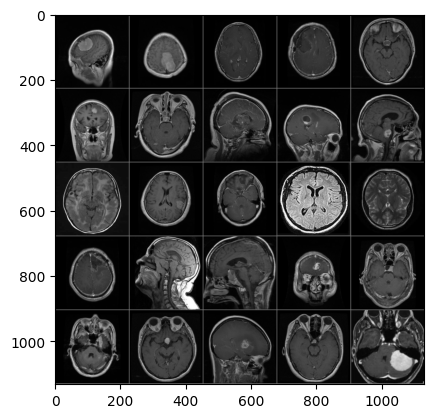

In [11]:
dataiter = iter(train_loader)
images, labels = next(dataiter)
img_grid = torchvision.utils.make_grid(images[0:25], nrow=5)
show_images(img_grid)

In [12]:
# NM - teorija

# Convolutional Neural Network = CNN = ConvNet
Jedan od oblika dubokog učenja je konvolucijska neurosnka mreža, koja se pored svoje veliki efikasnosti u obradi slika, takođe koristi za audio i druge signalne podatke. Konvolucijska neuronska mreža se razlikuje od obične neurosnke mreže, po tehnici koju primenjuje i koju nosi u svom nazivu. U matematici konvolucija predstavlja operaciju nad dve fukcije koja proizvodi treću funkciju - ova funkcija izražava kako se oblik jedne funkcije modifikuje od strane druge.

## Arhitekture konvolucijske neurosnke mreže

CNN se sastoji od nekoliko slojeva:
<ul>
    <li>Input layer (ulazni sloj - podaci)</li>
    <li>Convolutional layers (konvolucijski slojevi)</li>
    <li>Pooling layers (slojevi sažimanja)</li>
    <li>Fully connected layers (potpuno povezani slojevi)</li>
    <li>Output layer (izlazni sloj - predviđanja)</li>
</ul>


<div style="text-align:center;">
    <img src="https://miro.medium.com/v2/resize:fit:1100/format:webp/0*1KEew1smVFM7AnA3" alt="CNN" />
</div>

## Input layer
Ulazni sloj predstvalja prvi sloj u arhitekturi mreže koji prima podatke i prosleđuje ih dalje kroz mrežu radi obrade. Za razliku kod tradicionalnih neuronskih mreža, gde podaci predstvaljau vektor - jednodimenzionlani niz, ovde su podaci predstavljeni kao višedimenzionalni nizovi, odnosno matrice.

## Convolutional layer
Ovaj sloj predstvalja osnovni gradivni blok mreže, gde se odvija konvolucija, koristeći filter koji se još zove i kernel; ovaj filter je dvodimenzijalna matrica malih dimenizija. Proces na ovom sloju započinje tako što filter prelazi preko širine i dužine slike. Kernel klizi preko slike, pomera za za određen broj piksela/koraka koji se prlikom implementacije označava sa parametrom *stride*. Nakon svakog pomeranja kernela, za svako  lokalno receptivno polje, računa se skalarni proizvod između kernela i piksela slike iznad koje se kernel nalazi. Skalarni proizvod predstavlja *element-wise* množenje gde se vrednosti piksela slike množe sa podudarajućim vrednostima kernela, nakon čega se svi dobijeni proizvodi saberu. Rezulatat ovog računanja ukazuje na prisutnost određenog obrasca/karakteristke na datom delu slike. Odnosno rezultat skalarnog proizvoda ukazuje na meru sličnosti između kernela i dela slika koji se analizira, čime se identifikuju određeni paterni slike. Korišćenjem većeg broja različitih kernela, omogućava se prepoznavanje različitih obrzaca na slici.

Ukoliko je slika u boji, prema RGB modelu, svaki piksel slike je definisan kombinacijom intenziteta crvene, zelene i plave boje. Slika će pored svoje širine i dužine, imati i svoju dobinu, odnosno ta dubina se sastoji od tri kanala, gde se svaki kanal odnosi na jednu od komponenti boje koje čine sliku. U ovom slučaju će postojati zaseban kernel koji se primenjuje nezavisno za svaki kanal .

<img src="https://editor.analyticsvidhya.com/uploads/556091_ciDgQEjViWLnCbmX-EeSrA.gif" alt="Convolution Convolution of RGB image" />

Nakon procesa konvolucije, kao njen rezultat dobija se *feature map*. Ova mapa karakteristika predstvalja prisustvo određenog obrasca detektovanog odgovarajućim filterom duž prostornih dimenzija ulaza. Mapa karakteristika predstvalja ulaz za aktivacionu funkciju (kao što je npr. ReLU) i kao izalz iz ove funkcije dobija se *activation map*.

Prvi konvolucijski sloj identifikuje proste obrasce poput horizonatlnih i dijagonalnih ivica, tekstura, boja... Izalz iz ovog sloja predstavlja ulaz za sledeći sloj, čime se u svakom narednom dubljem sloju identifikuju sve komleksniji paterni - objekti, scene...

## Pooling layer
Sloj sažimanje sledi nakon konvolucijskog sloja, u kome se dešava sličan proces kao u konvolucijksom, ali sa drugačijom funkcijom. Prozor malih dimenzija prelazi preko aktivacionih mapa, a za svaku poziciju prozora uzima se maksimalna vrednost piksela regiona aktivacione mape iznad koje se prozor nalazi. Maksimalna vrednsot se uzima ukoliko se koristi Max Pooling, dok se prosečna vrednsot uzima, ukoliko se koristi Average Pooling metoda. Jedan od ciljeva ovog postupka je da se smanje dimenzije mapa koje prolaze kroz slojeve mreže, samim tim se smanjuje broj parametra i količina računjanja u mreži.

<div style="text-align: center;">
    <img src="https://miro.medium.com/v2/resize:fit:1100/format:webp/1*fXxDBsJ96FKEtMOa9vNgjA.gif" alt="Convolution Max Pooling and Average Pooling being performed" />
</div>

U konvolucijskom sloju su formirane mape karakteristika koje imaju za cilj da zabeleže gde se određene karakteristike nalaze na slici. Putem konvolucijskog sloja, mreža uči da detektuje neki objekat na slici, ali takođe pamti i na kom delu slike se taj objekat nalazai. Ovo predstvalja problem ukolko se perspektiva slike menja, ili ukoliko objekat nije na istom njenom delu, u takvom slučaju objekat neće biti prepoznat. Slojevi sažimanja upravo pružaju rešenje ovom problemu. Pooling layer obezbeđuje *Translational Invariance*, odnosno omogućava mreži da bude invarijantna na translacije. Ovo se postiže agregiranjem informacija iz više piksela u manje regione i zadržavanjem samo najvažnijih informacija, čime se osigurava da se važne karakteristike prepoznaju bez obzira na njihovu tačnu lokaciju na slici.



## Fully connected layer
Nakon identifikovanih obrzaca na slikama kroz *Convolutional layer*  i sažimanjem dimenzija i obezbeđivanjem invarijantnosti na translacije kroz *Pooling layer*, u finalnoj fazi dolazi *Fully connected layer* koji odgovoran za klasifikaciju slika na osnovu naučenih obrazaca.

Ulaz u ovaj potpuno povezani sloj može biti izlaz ili iz konvolucijskog sloja, ili iz sloja sažimanja. Ovaj izlaz se zatim ravna - *Flatten* i ulazi u potpuno povezan sloj. Ovo ravnanje je neophodan korak, kako izlaz iz prethodnog sloja predstvalja matricu, ili pak trodimenzijalnu matricu ukoliko je slika u boji; pa ovaj proces ravnanja predstavlja raspakivanje vrednosti matrice u jedan vektor.

<div style="text-align: center;">
    <img src="https://miro.medium.com/v2/resize:fit:572/1*N74xher1f5gJSHY-_o_rQQ.png" alt="Convolution Max Flattening layer in CNN" />
</div>

Potpuno povezan sloj kao svoj ulaz prima rezultat porcesa ravnanja, odnosno prima vektor - jednodimezionalni niz. Vektor predstavlja niz vrednosti piksela i svaka vredsnot je povezana sa svim neuronima u ovom sloju. Upravo svakoj ovoj vezi je dodeljen težinski koeficijent - *weight* i svaki neuron će imati određenu vrednost za pristrasnost - *bias*. Vrednost svakog neurona se dobija putem sledeće dve transformacije:

<ol>
    <li>Prvo nastupa linearna transformacija ulaznih podataka, tako što se vrednost svakog piksela pomnoži sa svojim odgovarajućim težinskim koeficijentom koji je povezan sa datim neuronom, zatim se saberu svi ovi dobijeni proizvodi i na tu sumu se doda pristrasnot za dati neuron.
    </li>
    <li>Rezultat prethodne linearne tranformacije, predstvalja ulaz za aktivacionu funkciju (npr. ReLU, Sigmoid, Tanh - hiperbolički tanges) i cilj ove funkcije je da obezbedi nelineranu transofrmaciju, odnosno ovim se modelu omogućava učenje složenijih i nelinearnih relacija između ulaznih i izlaznih podataka.
    </li>
</ol>

<div style="text-align: center;">
    <img src="https://miro.medium.com/v2/resize:fit:828/format:webp/1*sPg-0hha7o3iNPjY4n-vow.jpeg" alt="Neuron value calculation" width="500"/>
</div>



<div style="text-align: center;">
    <img src="https://www.jeremyjordan.me/content/images/2017/07/Screen-Shot-2017-07-27-at-12.07.33-AM.png" alt="FC layer" />
</div>

## Output layer
Izlazni sloj i poslednji sloj u mreži koji generiše konačne predikcije na osnovu obrađeni ulaznih podataka. U zavisnosti od oblika izlzne vredsnoti koja se predviđa, izlazni sloj može biti klasifikacija, ili regresija.
<ul>
    <li>Klasifikacija --- ako je u pitanju klasifikacioni zadatak, izlazni sloj će sadržati onaj broj neurona koliko ima klasa u datom skupu podatka. Ulaz u ovaj sloj predstavlja izalz iz prethodnog sloja - potpuno povezanog sloja, koji će zapravo biti ulaz za aktivacionu funkciju (npr. Softmax funkcija), koja transformiše ulazne vrednosti u verovatnoće pripadnosti izalznoj klasi.
    </li>
    <li>Regresija --- za regrsinone probleme, izlazni sloj je predstvljen jednim neuronom koji će dati kontinulanu vrednsot kao rezultat predviđanja.
    </li>
</ul>


# Defining CNN structure

In [13]:
# NM - objašnjenje implemetacije 

Definisana klasa *ConvNet* nasleđuje klasu *Module* iz paketa *torch.nn*

U okviru ove klase inicijalizovani su sledeći slojevi:
<ul>
    <li>Četiri konvolucijska sloja definisani pomoću metode <a href="https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html">Conv2d</a>:
        <ul>
            <li>(in_channels) - brojem ulaznih kanala</li>
            <li>(out_channels ) - brojem izlaznih kanala koji će se genrisati procesom konvolucije</li>
            <li>(kernel_size) - dimenzije kernela NxN</li>
        </ul>
    </li>
    <li>Sloj sažimanja definsian preko metode <a href="https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html">MaxPool2d</a>
        <ul>
            <li>(kernel_size) - dimenzije prozora (NxN) koji će prelaziti preko slike </li>
            <li>(stride) - broj piksela za koliko se pomera prozor</li>
        </ul>
    </li>
    <li>Dva potpuno povezana sloja definisani pomoću <a href="https://pytorch.org/docs/stable/generated/torch.nn.Linear.html"> Linear</a>
        <ul>
            <li>(in_features) - broj ulaza koji predstavlja dimezionalnost izlaza iz prethodnog sloja (brojKanalaIzlazaPoslednjegSloja * širinaSlike * dužinaSlike (dimenzije slike nakon sažimanja ukoliko je primenjeno))</li>
            <li>(out_features) - broj neurona na izalzu</li>
        </ul>
    </li>
</ul>



U okviru metode forward definisan je proces prolaska unupred kroz mrežu, koji se odvija na sledeći način:
<ol>
    <li>
        Ulazni podaci su dimenzija: torch.Size([32, 3, 224, 224])
        <ul>
            <li>32 - batch size </li>
            <li>3 - broj ulaznih kanala je 3 kako je slika u boji (RGB model)</li>
            <li>224 - dimezije slike: širina i dužina</li>
        </ul>
    </li>
    <li>Ulazni podaci prolaze kroz prvi konvolucijski sloj, koji je definisan sa 3 ulazna kanala kako je originalna slika u boji (RGB model) i sa 16 filtera koje će proizvesti navedeni broj feature map-a. Svaka mapa sadrži informacije za neku određenu karakteristuku sa slike.
    </li>
    <li>
        Izlaz iz prvog konvolucijskog sloja je ulaz u ReLU aktivacionu funkciju
    </li>
    <li>
        Nakon aktivacione funkcije, primenjuje se Pooling layer, gde se vrši sažimanje na osonvu prozora dimezije 2x2 i sa korakom od 2 piksela. Dimenzije će biti duplo smanjenje, tako da će dimezije mapa biti 111x111.
    </li>
    <li>
        Nakon sloja sažimanja primenjuje se drugi konvolucijski sloj, čiji je broj ulaznih kanala jednak broju izlaza iz prethodnog sloja, što je 16. Broj ilzanih kanala, odnosno broj filtera, ponovo se proizvoljno definiše, što je u ovom sloju vrednsot od 32 izlazna kanala.
    </li>
    <li>
        Izlaz iz drugog konvolucijskog sloja je ulaz u ReLU aktivacionu funkciju
    </li>
     <li>
        Nakon aktivacione funkcije, primenjuje se ponovo Pooling layer definsian isto kao i prethodni. Ponovo se duplo smanjuju dimenzije mapa koje će sada biti 54x54.
    </li>
    <li>
        Nakon drugog Pooling-a, primnejuje se treći konvolucijski sloj, definisan sa 32 ulazna kanala (kako smo definisali navedeni broj izalaza u prethodnom sloju) i sa 64 izlazna kanala, odnosno 64 filtera.
    </li>
    <li>
        ReLU aktivaciona funkcija prima izlaz trećeg konvolucionog kanala.
    </li>
    <li>
        Primenjuje se Pooling layer, dimenzije mapa se duplo smanjuj i sada izsnose 26x26.
    </li>
    <li>
        Poslednji, četvrti konvolucijski sloj definisan sa 64 ulazna i 64 izalzna kanala. Dimenzije izlaza nakon ovog sloja biće: torch.Size([32, 64, 24, 24]).
    </li>
    <li>
         Nakon poslednjeg konovolucijskog sloja, vrši se Flattening, odnosno vredsnoti piksela su predstavljene kao vektor - jednodimenzionalni niz. Dimenzije ovog izlaza će biti: 64x24x24 => 36864
    </li>
    <li>
        Definisani vektor je ulaz za prvi Fully connected layer, koji je definsian sa 36864 ulaza i 64 izlaza
    </li>
    <li>
        Drugi i posldenji Fully connected layer, definisan je sa 64 ulaza (broj izalaza iz prethodnog sloja) i sa 4 izlaza kako imamo četiri definisane izlazne klase (glioma, meningioma, no tumor, pituitary)
    </li>
    
</ol>





In [14]:
import torch.nn as nn
import torch.nn.functional as F

In [15]:
class ConvNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 16, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, 3)
        self.conv3 = nn.Conv2d(32, 64, 3)
        self.conv4 = nn.Conv2d(64, 64, 3)
        self.fc1 = nn.Linear(64*24*24, 64)
        self.fc2 = nn.Linear(64, 4)
        
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = F.relu(self.conv3(x))
        x = self.pool(x)
        x = F.relu(self.conv4(x))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [16]:
# NM - teorija: proces učenja

## Proces učenja
Kroz *forward pass* (prolaz unapred), ulazni podaci ulaze u mrežu i prolaze kroz svaki sloj gde se vrše operacije, tako da rezultat operacija nad podacima u svakom sloju, predstavlja ulaz za naredni. Prilikom prvog *forwardpass*-a vrednosti parametara koji se ažuriraju tokom učenja se određuju nasumično. 

Kada podaci prođu kroz mrežu, odnosno kada se završi *forwardpass*, mreža kreira izalz - pravi predikcije. Nakon dobijenih predviđanja, koristi se *Loss function* (funkcija gubitka) koja meri razliku između dobijenih predikcija i stvarnih vrednsoti. Neke od funkcija koje se koriste za merenje navedenog gubtika (*Loss-a*) su: Categorical Cross-Entropy (za višeklasnu klasifikaciju), Binary Cross-Entropy (za binarnu klasifikaciju), Mean Squared Error - MSE (za regresinone zadatke).

Ključni korak u procesu učenja predstavlja proces koji se zove *backpropagation*. Ideja ovog procesa je da se smanji funkcija gubitka, kako je cilj da predviđene vrednosti budu što bliže stvarnim. Računanje izvoda opisuje pomenu izlaza neke funkcije, prilkom promenjenog ulaza; upravo računajem izvoda funkcije gubitka (*Loss function*) određuje se kako se njena vrednost menja sa promenjenim ulazima u neurosnkoj mreži.

<div style="text-align:center;">
    <img src="https://pg.edu.pl/files/cnm/2021-12/Slope%20of%20the%20tangent%20line.gif" alt="Derivative" width="700">
</div>


Izvod *Loss* funkcije se dobija računanjem niza izvoda koristeći pravilo poznato kao *chain rule*. Ovaj postupak podrazumeva množenje izvoda složenih funkcija kako bi se na kraju dobio izvod funkcije gubitka. Izvodi se računaju na svkom sloju u neuronskoj mreži, počevši unazad i idući ka prvom sloju. Izvod svakog sloja opisuje kako će se vrednsot funkcije gubitka promeniti sa određenom promenom na tom sloju. Za svaki neuron računaju se gradijenti - parcijalni izvodi funkcije gubitka u odnosu na sve parametre u tom neuronu. Primenom pravila *chain rule*, ovi gradijenti se množe, čime se dobijaju konačni gradijenti funkcije gubitka. 

Upravo ovaj postupak omogućava da se odrede nove vrednosti parametara koji se ažuriraju, nakon zavšenog procesa učenja. Parametri koji se menjauju jesu vredsnoti kerenela u konvolucijskom sloju, kao i težinski koeficijenti i pristrasnosti u potpuno povezanom sloju.

Nakon završenog procesa učenja, vrednosti parametara se ažuriraju koristeći neki od optimizacionih algoritama (zbog minimizacije funkcije gubitka), koji koriste prethodno izračunate gradijente. Posle ovog koraka, gradijente je potrebno restartovati na nulu, kako bi se ispočetka računali za sledeči *backpropagation* proces.
Neki od optimizacionih algoritama su:
<ul>
    <li>SGD - Stochastic Gradient Descent</li>
    <li>Stochastic Gradient Descent with Momentum</li>
    <li>AdaGrad - adaptive gradient</li>
    <li>RMSProp - Root Mean Square Propagation</li>
    <li>Adam - Adaptive Momentum</li>
</ul>



# Creating a model

In [17]:
models = {
    "model_SGD": ConvNet(),
    "model_SGD_with_momentum": ConvNet(),
    "model_Adagrad": ConvNet(),
    "model_RMSprop": ConvNet(),
    "model_Adam": ConvNet()
}

criterion = nn.CrossEntropyLoss().to(device)

### Hyper-parameters 

In [18]:
NUM_EPOCHS = 10
BATCH_SIZE = 32
LEARNING_RATE = 0.001

# Training

In [19]:
accuracy_results = {}
loss_results = {}

for model_name, model in models.items():
    model.to(device)

    optimizer = None
    if model_name == "model_SGD":
        optimizer = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE)
    elif model_name == "model_SGD_with_momentum":
        optimizer = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE, momentum=0.8)
    elif model_name == "model_Adagrad":
        optimizer = torch.optim.Adagrad(model.parameters(), lr=LEARNING_RATE)
    elif model_name == "model_RMSprop":
        optimizer = torch.optim.RMSprop(model.parameters(), lr=LEARNING_RATE)
    elif model_name == "model_Adam":
        optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)

    n_total_steps = len(train_loader)
    train_losses = []
    train_accuracies = [] 

    for epoch in range(NUM_EPOCHS):
        model.train()
        
        train_loss = 0
        
        correct = 0
        total = 0

        for batch_idx, (images_batch_x, target_batch_y) in enumerate(train_loader):
            images_batch_x = images_batch_x.to(device)
            target_batch_y = target_batch_y.to(device)

            # Forward pass
            outputs_yhat = model(images_batch_x)
            loss = criterion(outputs_yhat, target_batch_y)

            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            train_loss += loss.item()
            
            # Calculate accuracy
            _, predicted = torch.max(outputs_yhat.data, 1)
            total += target_batch_y.size(0)
            correct += (predicted == target_batch_y).sum().item()

        avg_train_loss = train_loss / n_total_steps
        train_losses.append(avg_train_loss)
        
        # Calculate training accuracy for the epoch
        epoch_accuracy = (correct / total) * 100
        train_accuracies.append(epoch_accuracy)

        print(f'Model: {model_name}, Epoch [{epoch + 1}/{NUM_EPOCHS}], Train Loss: {avg_train_loss:.3f}, Train Accuracy: {epoch_accuracy:.2f}%')
    
    # Store accuracy and loss results for the model
    accuracy_results[model_name] = train_accuracies
    loss_results[model_name] = train_losses
    
    print('-' * 80)

Model: model_SGD, Epoch [1/10], Train Loss: 1.390, Train Accuracy: 23.13%
Model: model_SGD, Epoch [2/10], Train Loss: 1.386, Train Accuracy: 23.20%
Model: model_SGD, Epoch [3/10], Train Loss: 1.383, Train Accuracy: 35.43%
Model: model_SGD, Epoch [4/10], Train Loss: 1.379, Train Accuracy: 37.89%
Model: model_SGD, Epoch [5/10], Train Loss: 1.374, Train Accuracy: 40.25%
Model: model_SGD, Epoch [6/10], Train Loss: 1.369, Train Accuracy: 27.92%
Model: model_SGD, Epoch [7/10], Train Loss: 1.361, Train Accuracy: 27.92%
Model: model_SGD, Epoch [8/10], Train Loss: 1.349, Train Accuracy: 27.92%
Model: model_SGD, Epoch [9/10], Train Loss: 1.327, Train Accuracy: 28.13%
Model: model_SGD, Epoch [10/10], Train Loss: 1.288, Train Accuracy: 33.72%
--------------------------------------------------------------------------------
Model: model_SGD_with_momentum, Epoch [1/10], Train Loss: 1.369, Train Accuracy: 29.32%
Model: model_SGD_with_momentum, Epoch [2/10], Train Loss: 1.175, Train Accuracy: 51.12%
Mo

In [19]:
# Create the directory structure if it doesn't exist
results_dir = 'results/different_optimizers'
os.makedirs(results_dir, exist_ok=True)

In [21]:
# SAVING

# Loop through each model
for model_name, model in models.items():
    model_dir = os.path.join(results_dir, model_name)
    os.makedirs(model_dir, exist_ok=True)
    
    # Save the model
    model_filename = os.path.join(model_dir, f'{model_name}.pth')
    torch.save(model, model_filename)
    
    # Save accuracy and loss results
    accuracy_filename = os.path.join(model_dir, f'{model_name}_accuracy.pth')
    loss_filename = os.path.join(model_dir, f'{model_name}_loss.pth')
    
    torch.save(accuracy_results[model_name], accuracy_filename)
    torch.save(loss_results[model_name], loss_filename)
    
    print(f'Model "{model_name}" saved along with accuracy and loss data.')

Model "model_SGD" saved along with accuracy and loss data.
Model "model_SGD_with_momentum" saved along with accuracy and loss data.
Model "model_Adagrad" saved along with accuracy and loss data.
Model "model_RMSprop" saved along with accuracy and loss data.
Model "model_Adam" saved along with accuracy and loss data.


In [20]:
#LOADING

# Dictionaries to store loaded models, accuracy, and loss data
loaded_models = {}
loaded_accuracy = {}
loaded_loss = {}

# Loop through each model
for model_name in models.keys():
    model_dir = os.path.join(results_dir, model_name)
    
    # Load the model
    model_filename = os.path.join(model_dir, f'{model_name}.pth')
    loaded_models[model_name] = torch.load(model_filename)
    
    # Load accuracy and loss data
    accuracy_filename = os.path.join(model_dir, f'{model_name}_accuracy.pth')
    loss_filename = os.path.join(model_dir, f'{model_name}_loss.pth')
    
    loaded_accuracy[model_name] = torch.load(accuracy_filename)
    loaded_loss[model_name] = torch.load(loss_filename)
    
    # Print some information or perform any further processing
    print(f'Model "{model_name}" loaded successfully.')

Model "model_SGD" loaded successfully.
Model "model_SGD_with_momentum" loaded successfully.
Model "model_Adagrad" loaded successfully.
Model "model_RMSprop" loaded successfully.
Model "model_Adam" loaded successfully.


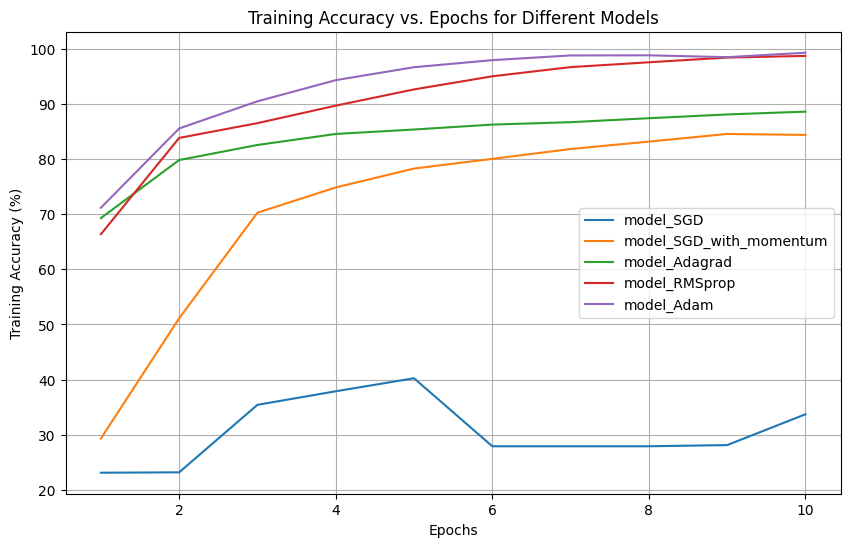

In [21]:
# Plotting training accuracy results for all models
plt.figure(figsize=(10, 6))
for model_name, accuracies in loaded_accuracy.items():
    plt.plot(range(1, NUM_EPOCHS + 1), accuracies, label=model_name)
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy (%)')
plt.title('Training Accuracy vs. Epochs for Different Models')
plt.legend()
plt.grid(True)
plt.show()

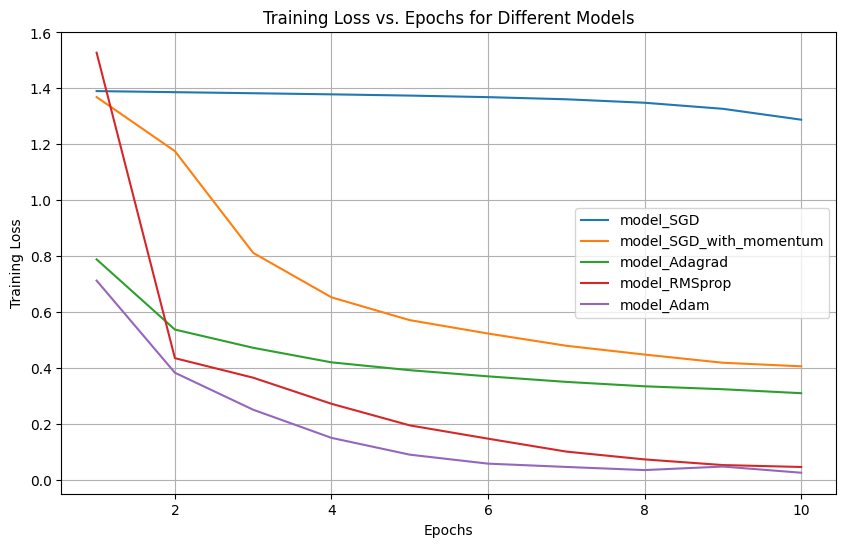

In [22]:
# Plotting training loss results for all models
plt.figure(figsize=(10, 6))
for model_name, losses in loaded_loss.items():
    plt.plot(range(1, NUM_EPOCHS + 1), losses, label=model_name)
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.title('Training Loss vs. Epochs for Different Models')
plt.legend()
plt.grid(True)
plt.show()

In [23]:
## PVI: rezultati

**model_SGD**: Model koristi osnovni Stohastički Gradijentni Spust (SGD), jednostavan algoritam koji koristi fiksni korak učenja (nema adaptivnog prilagođavanja koraka) za svaku iteraciju. Tokom učenja, gubitak se smanjuje postepeno, a tačnost se povećava, ali sporije nego kod drugih modela. To može značiti da model sporije konvergira i da mu treba više vremena da nauči kompleksne obrasce u podacima.

**model_SGD_with_momentum**: Ovaj model takođe koristi SGD, ali sa dodatkom momenta, što pomaže bržoj konvergenciji. Moment je dodatni parametar koji ubrzava konvergenciju tako što akumulira brzinu promene parametara tokom više iteracija. Vidimo značajno brže smanjenje gubitka tokom obuke, zajedno sa brzim povećanjem tačnosti. To ukazuje na to da model koristi moment da brže prilagodi parametre.

**model_Adagrad**: Adagrad adaptivno prilagođava korake učenja (*learining rate*) za svaki parametar posebno,  smanjujući korak za parametre koji su često ažurirani, a povećavajući za one koji su retko ažurirani. Tokom učenja, gubitak se postepeno smanjuje, a tačnost raste stabilno. Ovo je znak da Adagrad efikasno prilagođava korake učenja, što dovodi do stabilne konvergencije i daje bolje rezulate u poređenju na prethodna dva algoritma.

**model_RMSprop**: RMSprop takođe prilagođava korake učenja kao Adagrad, ali umesto akumulacije svih prethodnih gradijenata, RMSprop koristi pokretni prosek kvadrata prethodnih gradijenata. Vidimo veoma brzo smanjenje gubitka tokom obuke, zajedno sa brzim povećanjem tačnosti. Ovo ukazuje na to da RMSprop efikasno prilagođava korake učenja i brzo konvergira.

**model_Adam**: Adam kombinuje prednosti Adagrad-a i RMSprop-a. Kao RMSprop, Adam koristi pokretni prosek kvadrata gradijenata kako bi adaptivno prilagodio korak učenja. Vidimo brzo i stabilno smanjenje gubitka tokom obuke, uz brzo povećanje tačnosti. Ovo pokazuje da Adam efikasno kombinuje adaptivne korake učenja, što dovodi do brze i stabilne konvergencije.

# Testing

In [24]:
# NM - implemetacija objašnjenje

Naredni kod se koristi za evaluaciju modelu koji je krairan nad podacima za treniranje. U prvom koraku se onemogućuje računanje gradijenata, kako se u ovom procesu parametri ne ažuriraju, već je cilj ovog procesa da se proceni tačnost kreiranog modela nad podacim koje model nikada nije video.

Pomoću petlje prolazimo kroz sve uzorke iz skupa za testiranje i iz ovog skupa posebno izdvajamo slike i klase kojoj svaka slika pripada. Svaka iteracija predstavlja seriju (batch) od 32 uzorka iz testnog skupa, jer je taj broj uzet prilikom definisanja *loader-a*.

Prilikom svake iteracije kreirani model prima slike kao ulaz i generiše predikcije kao izlaz - *outputs*. Ovi izlazi su obično vektori sa verovatnoćama ili ocenama pripadnosti za svaku klasu. U narednom koraku koristi se funkcija *torch.max()* koja vraća dva rezultata, prvi koji u ovom slučaju zanemarujemo, a to je maksimalna vrednost za svaku sliku, a druga vrednost predstvalja indeks maksimalne vrednsoti, odnosno indeks klase koja je predviđena.

*correct += (predicted == labels).sum().item()* - Ova linija upoređuju predviđene klase *(predicted)* sa stvarnim klasama *(labels)* kako bi se dobila lista logičkih vrednosti (True ili False). Zatim se poziva .sum() funkcija kako bi se izračunao broj tačno predviđenih klasa, a *.item()* metoda se koristi kako bi se dobila tačna vrednost (u obliku skalara) umesto tenzora.

In [25]:
for model_name, model in loaded_models.items():
    model.to(device)  

    model.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)
            
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        test_accuracy = (correct / total) * 100
        print(f'Test Accuracy of {model_name}: {test_accuracy:.2f}%')

print('Finished testing all models with different optimizers.')

Test Accuracy of model_SGD: 38.14%
Test Accuracy of model_SGD_with_momentum: 81.46%
Test Accuracy of model_Adagrad: 84.59%
Test Accuracy of model_RMSprop: 94.43%
Test Accuracy of model_Adam: 95.96%
Finished testing all models with different optimizers.


Kako su najbolji rezultati dobijeni koristeći Adam optimizator, naredni modeli su kreirani na osnovu reazličite strukturu, ali sa istim algoritmom za optimizaciju - Adaptive momentum .

## Defining different model structures

In [26]:
class DeepConvNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, 3)
        self.conv2 = nn.Conv2d(32, 64, 3)
        self.conv3 = nn.Conv2d(64, 128, 3)
        self.conv4 = nn.Conv2d(128, 256, 3)  
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(256 * 12 * 12, 512)  
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 4)
        self.dropout = nn.Dropout(0.5)
        
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = F.relu(self.conv3(x))
        x = self.pool(x)
        x = F.relu(self.conv4(x))
        x = self.pool(x)
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return x

In [27]:
class WideConvNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 64, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(64, 128, 3)
        self.conv3 = nn.Conv2d(128, 256, 3)
        self.fc1 = nn.Linear(256 * 26 * 26, 512)  
        self.fc2 = nn.Linear(512, 4)

    def forward(self, x):
        x = F.relu(self.conv1(x))   # torch.Size([32, 64, 222, 222])
        x = self.pool(x)            # torch.Size([32, 64, 111, 111])
        x = F.relu(self.conv2(x))   # torch.Size([32, 128, 109, 109])
        x = self.pool(x)            # torch.Size([32, 128, 54, 54])
        x = F.relu(self.conv3(x))   # torch.Size([32, 256, 52, 52])
        x = self.pool(x)            # torch.Size([32, 256, 26, 26])
        x = torch.flatten(x, 1)     # torch.Size([32, 173056])
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [28]:
torch.cuda.empty_cache()

### Deep Model

In [30]:
deep_model = DeepConvNet().to(device)

criterion = nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.Adam(deep_model.parameters(), lr= LEARNING_RATE)

# Lists to store loss and accuracy data
dm_model_losses = []
dm_model_accuracies = []

n_total_steps = len(train_loader)

for epoch in range(NUM_EPOCHS):
    train_loss = 0
    correct = 0
    total = 0
    
    for batch_idx, (images_batch_x, target_batch_y) in enumerate(train_loader):
        images_batch_x = images_batch_x.to(device)
        target_batch_y = target_batch_y.to(device)
        
        # Forward pass
        outputs_yhat = deep_model(images_batch_x)
        loss = criterion(outputs_yhat, target_batch_y)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()  
        
        # Compute accuracy
        _, predicted = torch.max(outputs_yhat.data, 1)
        total += target_batch_y.size(0)
        correct += (predicted == target_batch_y).sum().item()
        
    # Calculate loss and accuracy for the epoch
    epoch_loss = train_loss / n_total_steps
    epoch_accuracy = (correct / total) * 100
    
    # Append data to lists
    dm_model_losses.append(epoch_loss)
    dm_model_accuracies.append(epoch_accuracy)
        
    print(f'[{epoch + 1}/{NUM_EPOCHS}] Train Loss: {epoch_loss:.3f}, Train Accuracy: {epoch_accuracy:.2f}%')
    
print('Finished training')

[1/10] Train Loss: 0.839, Train Accuracy: 65.28%
[2/10] Train Loss: 0.431, Train Accuracy: 84.17%
[3/10] Train Loss: 0.305, Train Accuracy: 89.09%
[4/10] Train Loss: 0.220, Train Accuracy: 92.24%
[5/10] Train Loss: 0.160, Train Accuracy: 94.36%
[6/10] Train Loss: 0.122, Train Accuracy: 95.55%
[7/10] Train Loss: 0.094, Train Accuracy: 96.92%
[8/10] Train Loss: 0.076, Train Accuracy: 97.43%
[9/10] Train Loss: 0.061, Train Accuracy: 97.95%
[10/10] Train Loss: 0.052, Train Accuracy: 98.25%
Finished training


#### Defining function for SAVING model and it's losses and accuracies

In [29]:
def save_model_and_data(model, model_losses, model_accuracies, results_dir, model_name):

    # Create the directory structure if it doesn't exist
    os.makedirs(results_dir, exist_ok=True)

    # Save the entire model
    model_filename = os.path.join(results_dir, f'{model_name}.pth')
    torch.save(model, model_filename)

    # Save loss data
    loss_filename = os.path.join(results_dir, f'{model_name}_loss.pth')
    torch.save(model_losses, loss_filename)

    # Save accuracy data
    accuracy_filename = os.path.join(results_dir, f'{model_name}_accuracy.pth')
    torch.save(model_accuracies, accuracy_filename)

    print(f'Model and loss/accuracy data for the {model_name} saved successfully.')

In [38]:
save_model_and_data(deep_model, dm_model_losses, dm_model_accuracies, 'results/different_models', 'deep_model')

Model and loss/accuracy data for the deep_model saved successfully.


#### Defining function for LOADING model and it's losses and accuracies

In [30]:
def load_model_and_data(model_filename, loss_filename, accuracy_filename):
    
    # Load the model
    model = torch.load(model_filename)

    # Load the loss data
    model_losses = torch.load(loss_filename)

    # Load the accuracy data
    model_accuracies = torch.load(accuracy_filename)

    print('Model and loss/accuracy data loaded successfully.')

    return model, model_losses, model_accuracies

In [31]:
model_filename = 'results/different_models/deep_model.pth'
loss_filename = 'results/different_models/deep_model_loss.pth'
accuracy_filename = 'results/different_models/deep_model_accuracy.pth'

deep_model, dm_model_losses, dm_model_accuracies = load_model_and_data(model_filename, loss_filename, accuracy_filename)

Model and loss/accuracy data loaded successfully.


In [32]:
torch.cuda.empty_cache()

### Wide Model

In [32]:
wide_model = WideConvNet().to(device)

criterion = nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.Adam(wide_model.parameters(), lr= LEARNING_RATE)


# Lists to store loss and accuracy data
wm_model_losses = []
wm_model_accuracies = []

n_total_steps = len(train_loader)

for epoch in range(NUM_EPOCHS):
    train_loss = 0
    correct = 0
    total = 0
    
    for batch_idx, (images_batch_x, target_batch_y) in enumerate(train_loader):
        images_batch_x = images_batch_x.to(device)
        target_batch_y = target_batch_y.to(device)
        
        # Forward pass
        outputs_yhat = wide_model(images_batch_x)
        loss = criterion(outputs_yhat, target_batch_y)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()  # Fix typo: loss.item
        
        # Compute accuracy
        _, predicted = torch.max(outputs_yhat.data, 1)
        total += target_batch_y.size(0)
        correct += (predicted == target_batch_y).sum().item()
        
    # Calculate loss and accuracy for the epoch
    epoch_loss = train_loss / n_total_steps
    epoch_accuracy = (correct / total) * 100
    
    # Append data to lists
    wm_model_losses.append(epoch_loss)
    wm_model_accuracies.append(epoch_accuracy)
        
    print(f'[{epoch + 1}/{NUM_EPOCHS}] Train Loss: {epoch_loss:.3f}, Train Accuracy: {epoch_accuracy:.2f}%')
    
print('Finished training')

[1/10] Train Loss: 0.697, Train Accuracy: 76.40%
[2/10] Train Loss: 0.283, Train Accuracy: 90.00%
[3/10] Train Loss: 0.123, Train Accuracy: 95.59%
[4/10] Train Loss: 0.080, Train Accuracy: 97.41%
[5/10] Train Loss: 0.060, Train Accuracy: 97.95%
[6/10] Train Loss: 0.044, Train Accuracy: 98.48%
[7/10] Train Loss: 0.026, Train Accuracy: 99.12%
[8/10] Train Loss: 0.006, Train Accuracy: 99.82%
[9/10] Train Loss: 0.009, Train Accuracy: 99.72%
[10/10] Train Loss: 0.006, Train Accuracy: 99.84%
Finished training


In [39]:
save_model_and_data(wide_model, wm_model_losses, wm_model_accuracies, 'results/different_models', 'wide_model')

Model and loss/accuracy data for the wide_model saved successfully.


In [33]:
model_filename = 'results/different_models/wide_model.pth'
loss_filename = 'results/different_models/wide_model_loss.pth'
accuracy_filename = 'results/different_models/wide_model_accuracy.pth'

wide_model, wm_model_losses, wm_model_accuracies = load_model_and_data(model_filename, loss_filename, accuracy_filename)

Model and loss/accuracy data loaded successfully.


In [34]:
models_accuracies_dic = {
    'ConvNet': loaded_accuracy['model_Adam'], 
    'DeepConvNet': dm_model_accuracies, 
    'WideConvNet': wm_model_accuracies
}

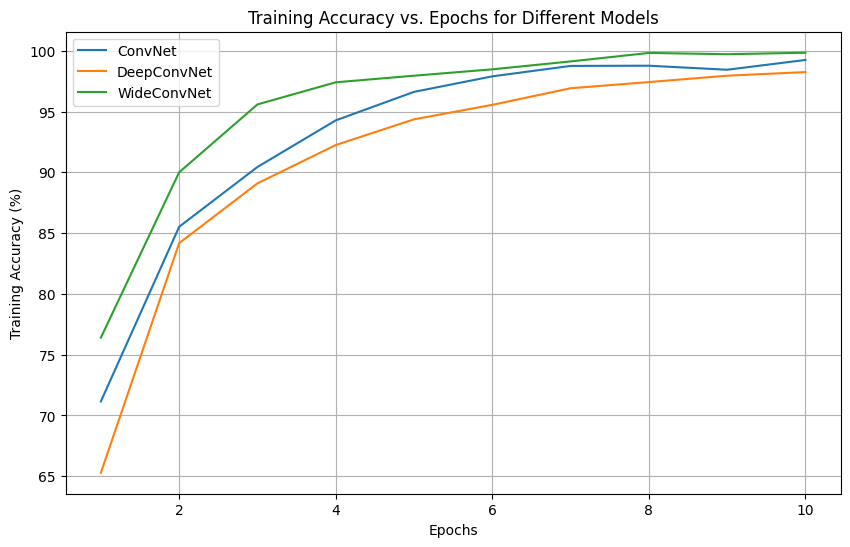

In [35]:
# Plotting training accuracy results for all models
plt.figure(figsize=(10, 6))
for model_name, accuracies in models_accuracies_dic.items():
    plt.plot(range(1, NUM_EPOCHS + 1), accuracies, label=model_name)
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy (%)')
plt.title('Training Accuracy vs. Epochs for Different Models')
plt.legend()
plt.grid(True)
plt.show()

In [36]:
models_losses_dic = {
    'ConvNet': loaded_loss['model_Adam'], 
    'DeepConvNet': dm_model_losses, 
    'WideConvNet': wm_model_losses
}

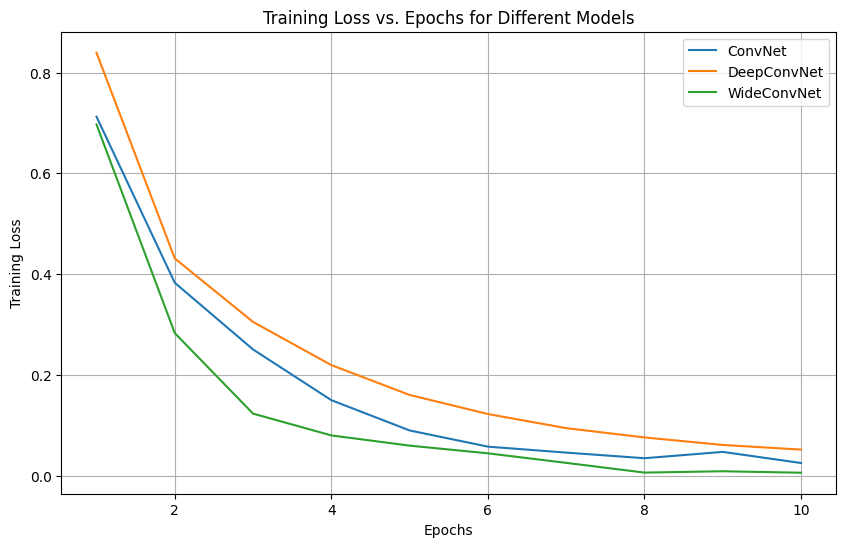

In [37]:
# Plotting training loss results for all models
plt.figure(figsize=(10, 6))
for model_name, losses in models_losses_dic.items():
    plt.plot(range(1, NUM_EPOCHS + 1), losses, label=model_name)
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.title('Training Loss vs. Epochs for Different Models')
plt.legend()
plt.grid(True)
plt.show()

In [38]:
# PVI: rezultatu

Svi modeli postigli su visoke rezultate tačnosti tokom procesa treniranja, što ukazuje na uspešno učenje i prilagođavanje modela skupu podataka za trening.

WideConvNet model postigao je najveću tačnost rokom treninga od 99.84%, sledi zatim ConvNet model sa tačnošću od 99.25%, dok je DeepConvNet model postigao točnost od 98.25%.

## Testing 

In [39]:
def testing(models, test_loader, device):

    for model_name, model in models.items():
        model.to(device) 
        model.eval()  
        with torch.no_grad():
            correct = 0
            total = 0
            for images, labels in test_loader:
                images = images.to(device)
                labels = labels.to(device)
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

            test_accuracy = 100 * correct / total
            print(f'Test Accuracy of {model_name}: {test_accuracy:.2f}%')

    print('Finished testing all models.')

In [40]:
models_dic = {
    'conv_model':loaded_models['model_Adam'],
    'deep_model':deep_model,
    'wide_model':wide_model
}
testing(models_dic, test_loader, device)

Test Accuracy of conv_model: 95.96%
Test Accuracy of deep_model: 95.96%
Test Accuracy of wide_model: 95.58%
Finished testing all models.


In [41]:
# PIV: rezultati

Svi modeli pokazuju dobru sposobnost učenja i dobru moć generalizaciju nad skupom podataka za testiranje. WideConvNet model, iako se pokazao kao najbolji nad podacima za treniranje, nad skupom podataka za testirane se nije značano razlikovao od druga dva modela. Sva tri modela imaju približno jednake rezultate tokom validacije, sa visokom tačnošću i dobrim performansama na nepoznatim podacima.